<a href="https://colab.research.google.com/github/Naveena01/crack_detection/blob/main/Laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


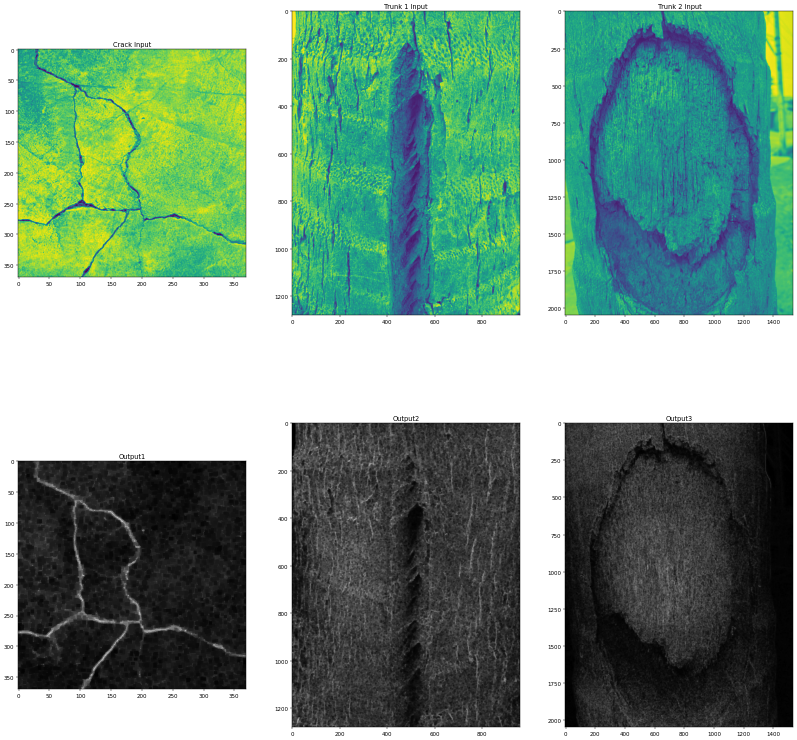

In [ ]:


# Open the image
crack = cv2.imread('/content/gdrive/MyDrive/Final_Year_Project/crack_detection/pavement_crack.jpg',0)
trunk1 = cv2.imread('/content/gdrive/MyDrive/Final_Year_Project/crack_detection/trunk1.jpeg',0)
trunk2 = cv2.imread('/content/gdrive/MyDrive/Final_Year_Project/crack_detection/trunk2.jpg',0)
plt.figure(num=None, figsize=(25,25), dpi=40, facecolor='w', edgecolor='k')
plt.subplot(2,3,1)
plt.title("Crack Input")
plt.imshow(crack)
plt.subplot(2,3,2)
plt.title("Trunk 1 Input")
plt.imshow(trunk)
plt.subplot(2,3,3)
plt.title("Trunk 2 Input")
plt.imshow(trunk2)



# Apply gaussian blur
blur_img1 = cv2.GaussianBlur(crack, (3, 3), 0)
blur_img2 = cv2.GaussianBlur(trunk1, (3, 3), 0)
blur_img3 = cv2.GaussianBlur(trunk2, (3, 3), 0)

# Positive Laplacian Operator
laplacian1 = cv2.Laplacian(blur_img1, cv2.CV_64F)
laplacian1=cv2.convertScaleAbs(laplacian1)
                               
laplacian2 = cv2.Laplacian(blur_img2, cv2.CV_64F)
laplacian2=cv2.convertScaleAbs(laplacian2)

laplacian3 = cv2.Laplacian(blur_img3, cv2.CV_64F)
laplacian3=cv2.convertScaleAbs(laplacian3)

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing1 = cv2.morphologyEx(laplacian1, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((5,5),np.uint8)
closing2 = cv2.morphologyEx(laplacian2, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((5,5),np.uint8)
closing3 = cv2.morphologyEx(laplacian3, cv2.MORPH_CLOSE, kernel)



plt.subplot(2,3,4)
plt.title('Output1')
plt.imshow(closing1, cmap='gray')
plt.subplot(2,3,5)
plt.title('Output2')
plt.imshow(closing2, cmap='gray')
plt.subplot(2,3,6)
plt.title('Output3')
plt.imshow(closing3, cmap='gray')


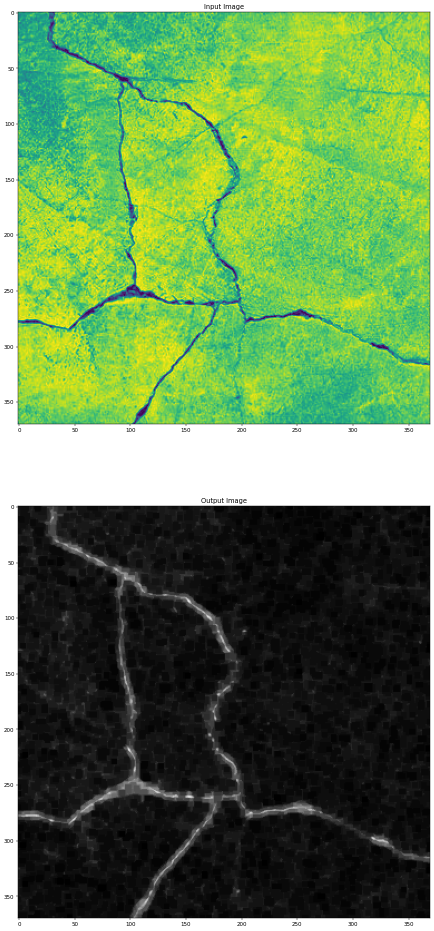

In [ ]:


# Open the image
gray_img = cv2.imread('/content/gdrive/MyDrive/Final_Year_Project/crack_detection/pavement_crack.jpg',0)
plt.figure(num=None, figsize=(30,30), dpi=40, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.title("Input Image")
plt.imshow(gray_img)


# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (7, 7), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
laplacian=cv2.convertScaleAbs(laplacian)

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, kernel)


plt.subplot(2,1,2)
plt.title('Output Image')
plt.imshow(closing, cmap='gray')
